<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/linea_de_espera_con_un_servidor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Probabilidades estimadas:
P(N=0) = 0.1628
P(N=1) = 0.2780
P(N=2) = 0.1934
P(N=3) = 0.1282
P(N=4) = 0.0811
P(N=5) = 0.0517
P(N=6) = 0.0354
P(N=7) = 0.0241
P(N=8) = 0.0148
P(N=9) = 0.0092
P(N=10) = 0.0064
P(N=11) = 0.0047
P(N=12) = 0.0034
P(N=13) = 0.0020
P(N=14) = 0.0015
P(N=15) = 0.0015
P(N=16) = 0.0011
P(N=17) = 0.0005
P(N=18) = 0.0001


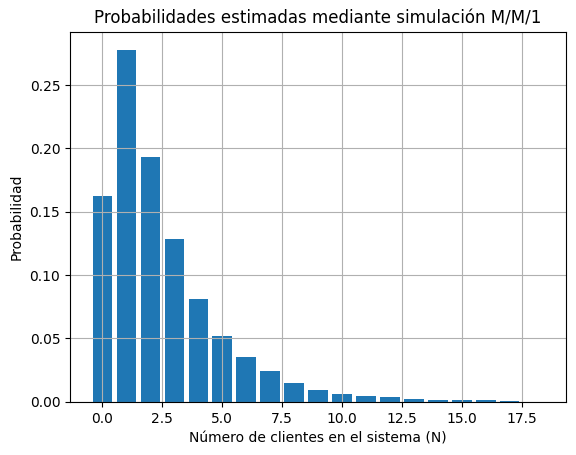

In [3]:
import numpy as np
import matplotlib.pyplot as plt

lambd = 2   #tasa de llegadas
mu = 3      #tasa de servicio
T = 5000    #tiempo de simulación

t = 0
N = 0  #clientes en el sistema

t_llegada = np.random.exponential(1/lambd)
t_salida = np.inf

historial_N = []

while t < T:

    if t_llegada < t_salida:
        t = t_llegada
        N += 1
        historial_N.append(N)

        t_llegada = t + np.random.exponential(1/lambd)

        if N == 1:
            t_salida = t + np.random.exponential(1/mu)

    else:
        t = t_salida
        N -= 1
        historial_N.append(N)

        if N > 0:
            t_salida = t + np.random.exponential(1/mu)
        else:
            t_salida = np.inf

conteo = {}

for n in historial_N:
    conteo[n] = conteo.get(n, 0) + 1

total = len(historial_N)

probabilidades = {n: conteo[n]/total for n in conteo}

print("\nProbabilidades estimadas:")
for n, p in sorted(probabilidades.items()):
    print(f"P(N={n}) = {p:.4f}")

plt.bar(probabilidades.keys(), probabilidades.values())
plt.xlabel("Número de clientes en el sistema (N)")
plt.ylabel("Probabilidad")
plt.title("Probabilidades estimadas mediante simulación M/M/1")
plt.grid(True)
plt.show()
